In [38]:
import scipy as sc
import matplotlib.pyplot as pl
import seaborn as sns

# Making plots pretty
sns.set(style="ticks", context="talk")
pl.style.use("seaborn-talk")
from pylab import rcParams
rcParams['figure.figsize'] = 9,9

from source.kldivs import KLNormal
from source.mgfs import MGFNormal
from source.explicit_bounds import hExpVar
from source.gobounds import godiv

%matplotlib inline

# Comparing the approximation of a Normal distribution by another Normal

Consider $P=N(\mu_P, 1)=N(0,1)$ and $Q=N(\mu_Q, 3)$ for $\mu_Q\in (0,3)$. In this notebook, we compare the bias, $\mu_Q-\mu_P$, with the goal-oriented bounds and the concentration-information bounds.

First, we compute the KL divergence:

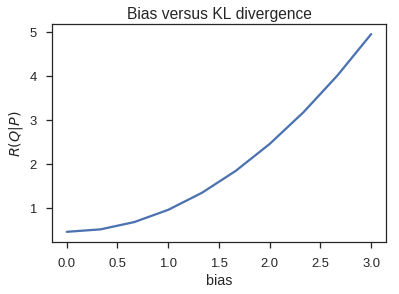

In [37]:
mu_q = sc.linspace(0.001,3,10)
kl_val = [KLNormal(mu, sc.sqrt(3.0), 0.0, 1.0) for mu in mu_q]

pl.plot(mu_q, kl_val)
pl.xlabel("bias")
pl.ylabel("$R(Q\|P)$")
pl.title("Bias versus KL divergence")

Next, we compute the goal-oriented (GO) bounds:

$$
-\Xi_-(Q\|P;f)\leq E_Q[f]-E_P[f]\leq \Xi_+(Q\|P;f),
$$

where $f(x)=x$. 

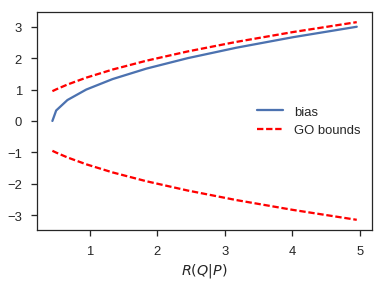

In [28]:
lcum = lambda c: sc.log(MGFNormal(c))
bounds = sc.array([godiv(eta, lcum) for eta in kl_val])

pl.plot(kl_val, mu_q, label="bias")
pl.plot(kl_val, bounds[:, 0], 'r--', label='GO bounds')
pl.plot(kl_val, bounds[:, 1], 'r--', label='__nolegend__')
pl.xlabel("$R(Q\|P)$")
pl.legend(loc=0)

Next, we compute the concentration-information bounds, assuming the sub-Gaussianity of $X$. To proceed, we only need an upper bound for the variance, $\sigma_b^2$. Then, 

$$
E_{P}[e^{cX}]\leq e^{\sigma_b^2 c^2/2} \text{ for all } c\in\mathbb{R}.
$$

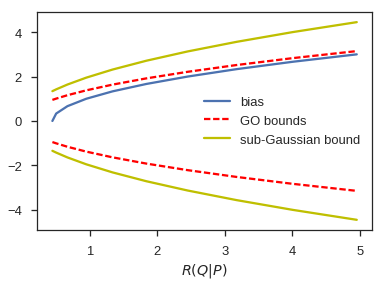

In [40]:
lcum = lambda c: sc.log(MGFNormal(c))
bounds = sc.array([godiv(eta, lcum) for eta in kl_val])

pl.plot(kl_val, mu_q, label="bias")
pl.plot(kl_val, bounds[:, 0], 'r--', label='GO bounds')
pl.plot(kl_val, bounds[:, 1], 'r--', label='__nolegend__')
pl.xlabel("$R(Q\|P)$")

# We assume that we know that the variance of X is bounded by 2. 
ubounds = sc.array([hExpVar(eta, 2) for eta in kl_val])
pl.plot(kl_val, ubounds[:, 0], 'y', label="sub-Gaussian bound")
pl.plot(kl_val, ubounds[:, 1], 'y', label='__nolegend__')
pl.legend(loc=0)

The sub-Gaussian approximation is exact in this case, as $P$ follows a Normal distribution; if we know the variance of $P$, the resulting sub-Gaussian bound is equal to the GO bound. However, the sub-Gaussian bound would be true for any sub-Gaussian $P$ with mean zero and variance smaller than $2$. 

For more details, see [the manuscript]().